<a href="https://colab.research.google.com/github/prajwal0210/us-accidents/blob/main/US_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US accidents Exploratory data analysis**



In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: processor8085
Your Kaggle Key: ··········


  3%|▎         | 10.0M/299M [00:00<00:03, 101MB/s]

100%|██████████| 299M/299M [00:01<00:00, 268MB/s]


In [ ]:
datafile_name = '/content/us-accidents/US_Accidents_Dec20.csv'

# **data preparation and cleaning**

1. Load file using pandas
2. look at some information about the data and the columns
3. fix any missing or incorrect values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(datafile_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

## percentage of missing values per column

In [ ]:
#finding missing values
missing_percentage = df.isna().sum().sort_values(ascending=False) * 100 /len(df)
missing_percentage

End_Lat                  64.180760
End_Lng                  64.180760
Number                   63.506745
Precipitation(in)        48.802575
Wind_Chill(F)            44.795809
TMC                      35.819240
Wind_Speed(mph)          11.324781
Visibility(mi)            2.331176
Weather_Condition         2.324443
Humidity(%)               2.255548
Temperature(F)            2.124020
Wind_Direction            1.975433
Pressure(in)              1.804684
Weather_Timestamp         1.480057
Airport_Code              0.212000
Timezone                  0.109036
Zipcode                   0.030525
Nautical_Twilight         0.003331
Astronomical_Twilight     0.003331
Civil_Twilight            0.003331
Sunrise_Sunset            0.003331
City                      0.003237
Description               0.000047
Amenity                   0.000000
Street                    0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

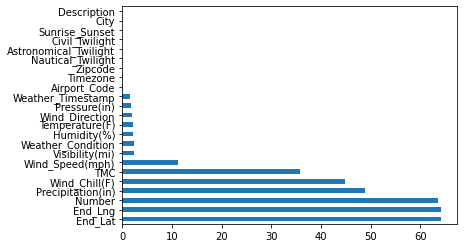

In [ ]:
missing_percentage [missing_percentage != 0].plot(kind='barh')

## remove columns you don't use

# **Exploratory analysis and visualization**

## Column's to analyse
 1. City
 2. Start time
 3. Start Lat, Start Lng
 4. Temperature
 5. Weather condition

### City

In [ ]:
cities = df.City.unique()
len(cities)

12251

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Elroy               1
State Line          1
Gentryville         1
Drayton             1
Hawesville          1
Name: City, Length: 12250, dtype: int64

In [ ]:
cities_by_accidents[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

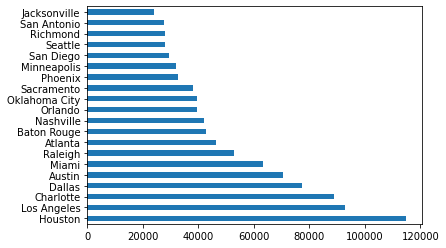

In [ ]:
cities_by_accidents[:20].plot(kind='barh')

In [ ]:
sns.set_style("darkgrid")

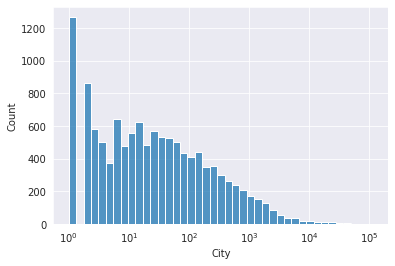

In [ ]:
sns.histplot(cities_by_accidents, log_scale=True)

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [ ]:
cities_by_accidents[cities_by_accidents == 1]

Cecilia         1
Petroleum       1
Gering          1
Saint Hedwig    1
Thayer          1
               ..
Elroy           1
State Line      1
Gentryville     1
Drayton         1
Hawesville      1
Name: City, Length: 1267, dtype: int64

### Start time

In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0].hour

5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


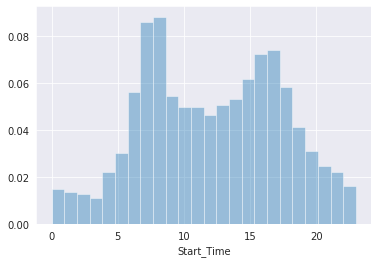

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24,kde=False, norm_hist=True) 

- A high percentage of accidents occur between 6am - 10am ( probably people in hurry to get work)
- Next highest percentage is 3pm - 6pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


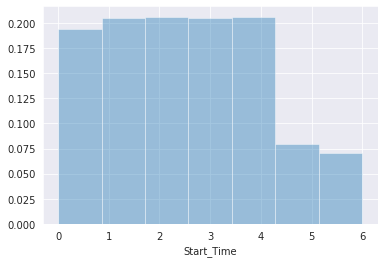

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7 ,kde=False, norm_hist=True) 

**during weekends we have less accidents** 

Is the distribution of accidents by hour the same on weekends as on weekdays


In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


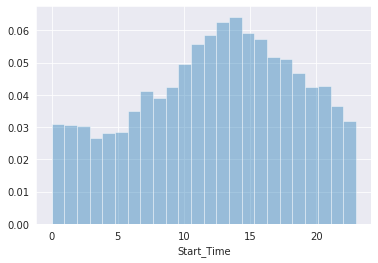

In [ ]:
sns.distplot(sundays_start_time.dt.hour, bins=24,kde=False, norm_hist=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


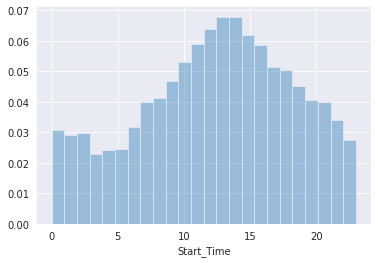

In [ ]:
saturday_start_time =  df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.distplot(saturday_start_time.dt.hour, bins=24,kde=False, norm_hist=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


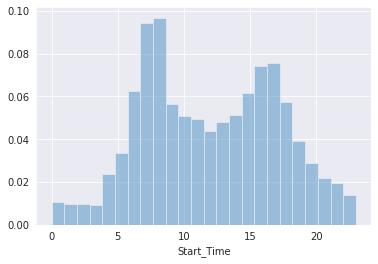

In [ ]:
monday_start_time =  df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour, bins=24,kde=False, norm_hist=True) 

on sundays the peek ouccurs between 10 am and 3 pm, unlike week days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


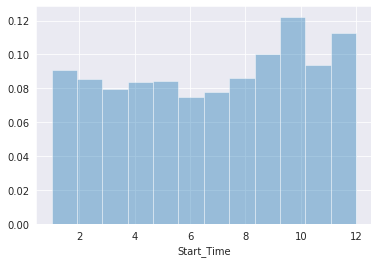

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12,kde=False, norm_hist=True) 

In [ ]:
df.Source

0          MapQuest
1          MapQuest
2          MapQuest
3          MapQuest
4          MapQuest
             ...   
4232536        Bing
4232537        Bing
4232538        Bing
4232539        Bing
4232540        Bing
Name: Source, Length: 4232541, dtype: object

Bing data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


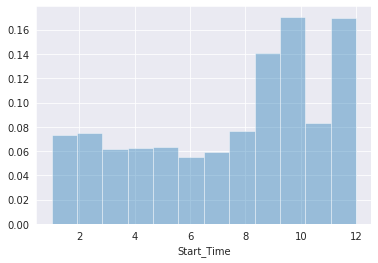

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'Bing']
sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12,kde=False, norm_hist=True) 

MapQuest Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


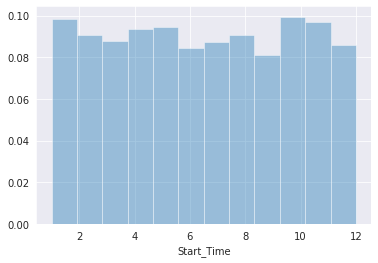

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_MapQuest = df_2019[df_2019.Source == 'MapQuest']
sns.distplot(df_2019_MapQuest.Start_Time.dt.month, bins=12,kde=False, norm_hist=True) 

- As you can see Bing data is quite unstable

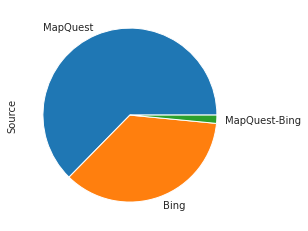

In [ ]:
df.Source.value_counts().plot(kind='pie')

- you should consider excluding Bing data as it may have some issues

# Start Lat & Start Long

In [ ]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [ ]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

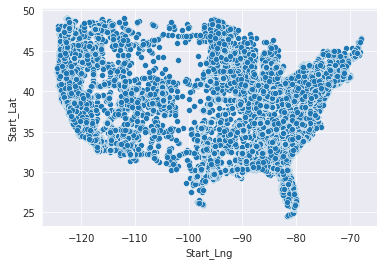

In [ ]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat)

## Asigining points in map using folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [ ]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x[1])

2835399    34.030060
740440     34.640461
3484732    36.326285
2982767    38.865930
1733980    33.872898
             ...    
681747     43.205074
3192095    38.594099
563176     34.856758
3034019    36.649394
3280616    39.390640
Name: Start_Lat, Length: 100, dtype: float64
2835399   -118.441540
740440     -82.448158
3484732   -119.273850
2982767    -77.051140
1733980   -118.342369
              ...    
681747     -86.204964
3192095    -76.045955
563176     -82.459732
3034019    -79.821767
3280616    -76.712985
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat),list(df.Start_Lng))

In [ ]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
from folium.plugins import HeatMap

map = folium.Map()


folium.plugins.HeatMap(lat_lon_pairs[:100]).add_to(map)
map

# **summary and conclusion**

Insight:
- No data from New York
- Less than 5% of cities have more than 1000 yearly accidents
- over 1200 cities have reported just one accident
- the number of accidents per cities decreases/increases exponentially